# custom emitters distribution


In [1]:
from jetset.jet_emitters import EmittersDistribution

you need to define a function that describes your functional form (use numpy functions to make the code more performant)

In [2]:
def distr_func_super_exp(gamma,gamma_cut,s,a):
    return np.power(gamma,-s)*np.exp(-(1/a)*(gamma/gamma_cut)**a)

then you have to link the parmeters in your funtcion to a  paramters of the `EmittersDistribution` class. 

In [21]:
n_e_super_exp=EmittersDistribution('super_exp')
n_e_super_exp.add_par('gamma_cut',par_type='turn-over-energy',val=50000.,vmin=1., vmax=None, unit='lorentz-factor')
n_e_super_exp.add_par('s',par_type='LE_spectral_slope',val=2.3,vmin=-10., vmax=10, unit='')
n_e_super_exp.add_par('a',par_type='spectral_curvature',val=1.8,vmin=0., vmax=100., unit='')


now you have to link your defined functional form  to the `EmittersDistribution` class.

In [22]:
n_e_super_exp.set_distr_func(distr_func_super_exp)

parameters can be easily set

In [23]:
n_e_super_exp.parameters.s.val=.4
n_e_super_exp.parameters.s.val=2.0
n_e_super_exp.parameters.gamma_cut.val=1E5
n_e_super_exp.normalize=True
n_e_super_exp.parameters.gmax.val=1E6

In [24]:
n_e_super_exp.parameters.show_pars()

   name         par type           units          val      phys. bound. min phys. bound. max  log  frozen
--------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
     gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
     gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
        N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
gamma_cut    turn-over-energy lorentz-factor* 1.000000e+05     1.000000e+00               -- False  False
        s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
        a  spectral_curvature                 1.800000e+00     0.000000e+00     1.000000e+02 False  False


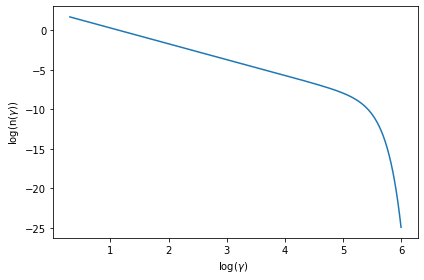

In [25]:
p=n_e_super_exp.plot()

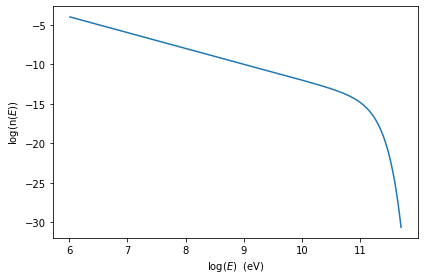

In [26]:
p=n_e_super_exp.plot(energy_unit='eV')

here we define a bkn power-law

    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
       gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
       gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
          N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
gamma_break    turn-over-energy lorentz-factor* 1.000000e+03     1.000000e+00               -- False  False
         s1   LE_spectral_slope                 2.500000e+00    -1.000000e+01     1.000000e+01 False  False
         s2   HE_spectral_slope                 3.200000e+00    -1.000000e+01     1.000000e+01 False  False


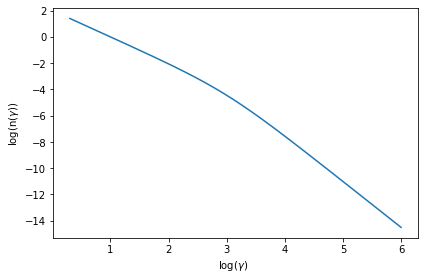

In [27]:

def distr_func_bkn(gamma_break,gamma,s1,s2):
    return np.power(gamma,-s1)*(1.+(gamma/gamma_break))**(-(s2-s1))

n_e_bkn=EmittersDistribution('bkn')
n_e_bkn.add_par('gamma_break',par_type='turn-over-energy',val=1E3,vmin=1., vmax=None, unit='lorentz-factor')
n_e_bkn.add_par('s1',par_type='LE_spectral_slope',val=2.5,vmin=-10., vmax=10, unit='')
n_e_bkn.add_par('s2',par_type='HE_spectral_slope',val=3.2,vmin=-10., vmax=10, unit='')
n_e_bkn.set_distr_func(distr_func_bkn)
n_e_bkn.parameters.show_pars()
n_e_bkn.parameters.s1.val=2.0
n_e_bkn.parameters.s2.val=3.5
p=n_e_bkn.plot()

##  passing the custom distribution to the Jet class

In [28]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution=n_e_bkn)

In [29]:
my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()



-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: bkn  
 gamma energy grid size:  1000
 gmin grid : -1.000000e+00
 gmax grid : -1.000000e+00
 normalization  False
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ----------

Since as default, the `Nomralization` is false, let's check the actual number density of particles and conpare it to the parameter `N`

In [30]:
N_particle=np.trapz(n_e_bkn.n_gamma_e,n_e_bkn.gamma_e)
print('N_particle=',N_particle,'N parameter=',n_e_bkn.parameters.N.val)

N_particle= 24556.885796901424 N parameter= 50000.0


In [17]:
my_jet.eval()
p.rescale(y_max=-12)

Now we shitch on the normalization for the emetters distribtuion, and we keep all the parameters unchanged, including N

In [18]:
my_jet.Norm_distr=True
my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()



-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: bkn  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ------------

and we check again the actual number density of particles and conpare it to the parameter N

In [31]:
N_particle=np.trapz(n_e_bkn.n_gamma_e,n_e_bkn.gamma_e)
print('N_particle=',N_particle,'N parameter=',n_e_bkn.parameters.N.val)

N_particle= 24556.885796901424 N parameter= 50000.0


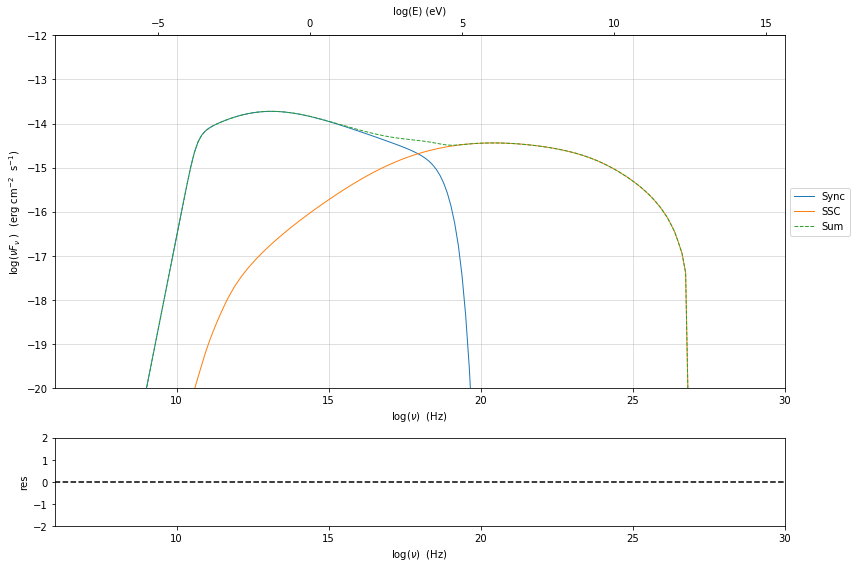

In [32]:
p=my_jet.plot_model()
p.rescale(y_max=-12)